CONSTRUINDO UM MODELO DE REGRESSAO LINEAR COM TENSORFLOW

In [1]:
#imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Definindo os hyperparâmetros do Modelo

In [2]:
#Hiperparametros do modelo
learning_rate = 0.01
training_epochs = 2000
display_step = 200

Definindo os datasets de treino e de teste 
Considere X como o tamanho de uma casa e o Y o preço e uma casa

In [3]:
#dataset de treino
train_x = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

#Dataset de teste
test_x = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

n_samples = train_x.shape[0]

In [4]:
#Dataset de teste
test_x = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

In [5]:
#PLACEHOLDERS E VARIAVEIS
''' 
    Placeholders para as variaveis preditoras (x)
    e para variável target (y) 
'''
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [6]:
''' Pesos e bias do modelo '''
w = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.rand(), name="bias")

In [7]:

#CONSTRUINDO O MODELO LINEAR
''' FÓRMULA MATEMATICA DO MODELO LINEAR
    y = W*X + b '''
linear_model = w*x + b

In [8]:
#Mean squared error (erro quadrado medio)
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)

In [9]:
#Otimizando com Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
#Executando  o grafo computacional, treinando e testando o modelo
'definindo a inicializaçao das variaveis'
init = tf.global_variables_initializer()

Epoch:   200 	 Cost:   0.07709 	 W:0.2589
Epoch:   400 	 Cost:   0.07703 	 W:0.2573
Epoch:   600 	 Cost:   0.07699 	 W:0.2561
Epoch:   800 	 Cost:   0.07697 	 W:0.2551
Epoch:  1000 	 Cost:   0.07695 	 W:0.2544
Epoch:  1200 	 Cost:   0.07694 	 W:0.2538
Epoch:  1400 	 Cost:   0.07694 	 W:0.2533
Epoch:  1600 	 Cost:   0.07693 	 W: 0.253
Epoch:  1800 	 Cost:   0.07693 	 W:0.2527
Epoch:  2000 	 Cost:   0.07693 	 W:0.2524

Optimization Completed
Final Cost of Training:  0.07693088  
Final Weight:  0.25244594 
Final Bias:  0.7930517 



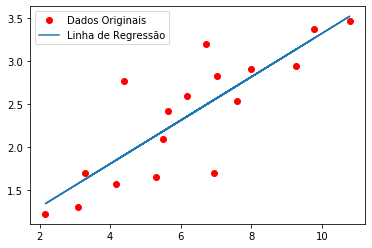

In [13]:

'iniciando a sessao'
with tf.Session() as sess:
    'iniciando as variaveis'
    sess.run(init)

    #treinando o modelo
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={x: train_x, y: train_y}) #otimizando com Gradient Descent

        #display de cada epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={x: train_x, y: train_y})
            print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4}".format(epoch+1, c, sess.run(w), sess.run(b)))

    #Imprimindo os parametros finais do modelo
    print("\nOptimization Completed")
    training_cost = sess.run(cost, feed_dict={x:train_x, y:train_y})
    print("Final Cost of Training: ", training_cost, " \nFinal Weight: ", sess.run(w), "\nFinal Bias: ", sess.run(b), "\n")

    #Visualizaçao do resultado
    plt.plot(train_x, train_y, 'ro', label="Dados Originais")
    plt.plot(train_x, sess.run(w) * train_x + sess.run(b), label="Linha de Regressão")
    plt.legend()
    plt.show()